

```
# This is formatted as code
```

# ** Iris Data Set**

The data associated with this notebook can be downloaded [here](https://drive.google.com/file/d/1UyAI5-4e6_1bkZpMEHSNW_9uKsiTTOhk/view?usp=sharing).






```
```



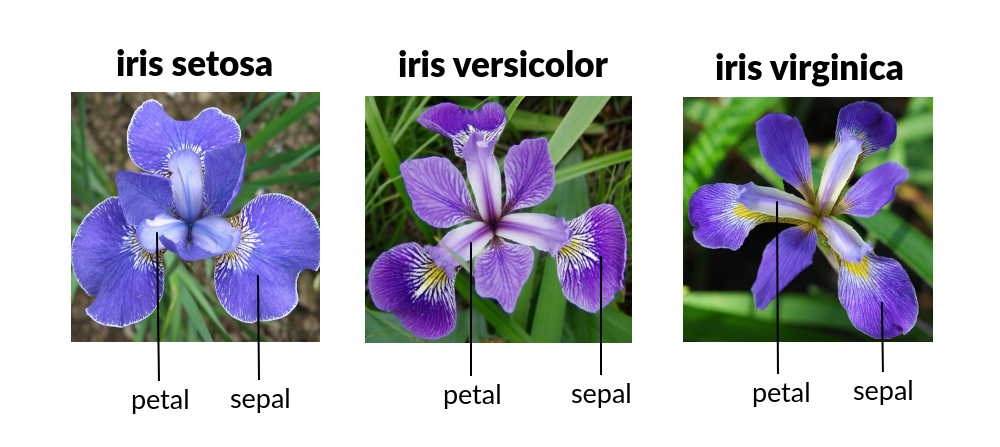
Source: https://medium.com/@naidubhavya06/detailed-explanation-of-exploratory-data-analysis-using-iris-dataset-fa8082a4ce0f Fair use claimed.

#**Libraries & Code**

In [ ]:
# Basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 13.9 MB/s 


In [ ]:
# XGBoost
from xgboost import XGBClassifier

In [ ]:
# LightGBM
#!pip install lightgbm
from lightgbm import LGBMClassifier

In [ ]:
# imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
# The code below comes from p. 32 of the class text by Raschka & Mirjlili
# It plots the decision regions of a classifier with two predictors

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()), plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

def decision_region(classifier_, X, y, title, x_ax, y_ax):
  plot_decision_regions(X, y, classifier=classifier_)
  plt.title(title)
  plt.xlabel(x_ax)
  plt.ylabel(y_ax)
  plt.legend(loc='upper left')
  plt.tight_layout()
  plt.show()

#**Read Data**

For simplicity, we'll work with the iris data set out of the box, with the exception of dummy-encioding the target variable ('Species')

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

# Read
file_ = "drive/My Drive/Colab Notebooks/iris.csv"   # adapt this as needed to the file structure on your Google drive
df = pd.read_csv(file_) # read in csv file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dummy-encode the target variable
df = pd.get_dummies(data=df, columns=['species'],drop_first=True)

# Examine the data using df.head()
print("HEAD of df\n", df.head(20))

# Shape of DataFrame
print("\nSHAPE of df\n", df.shape)

HEAD of df
     sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0            5.1          3.5           1.4          0.2                   0   
1            4.9          3.0           1.4          0.2                   0   
2            4.7          3.2           1.3          0.2                   0   
3            4.6          3.1           1.5          0.2                   0   
4            5.0          3.6           1.4          0.2                   0   
5            5.4          3.9           1.7          0.4                   0   
6            4.6          3.4           1.4          0.3                   0   
7            5.0          3.4           1.5          0.2                   0   
8            4.4          2.9           1.4          0.2                   0   
9            4.9          3.1           1.5          0.1                   0   
10           5.4          3.7           1.5          0.2                   0   
11           4.8          3.

#**Holdout Sample**

In [ ]:
# Split Predictors & Target
X = pd.DataFrame(df.drop(['species_virginica','species_versicolor'],axis=1))
y = pd.DataFrame(df['species_virginica'])

#**Standardize**

In [ ]:
cols = df.columns
Xcols = X.columns

# SMOTE The data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

# Standardize the predictors
stdsc = StandardScaler()
X_SMOTE_std = pd.DataFrame(stdsc.fit_transform(X_SMOTE))

# Spawn instance of random forest classifier, parametrized according to the gridseracgh in the classification notebook
from sklearn.ensemble import RandomForestClassifier
CLF = RandomForestClassifier(oob_score=True,class_weight= {0: 0.2, 1: 0.8}, criterion='gini',max_depth=7)

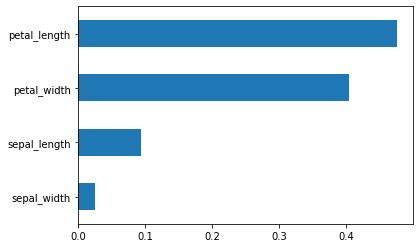

In [ ]:
# Fit Random Forest model, recover feature importances
CLF.fit(X_SMOTE_std,np.ravel(y_SMOTE))
feature_importances = pd.Series(CLF.feature_importances_, index=Xcols)
feature_importances.nlargest(10).sort_values().plot(kind='barh')

In [ ]:
y_pred = CLF.predict(X_SMOTE_std)
y_pred = pd.DataFrame(y_pred)

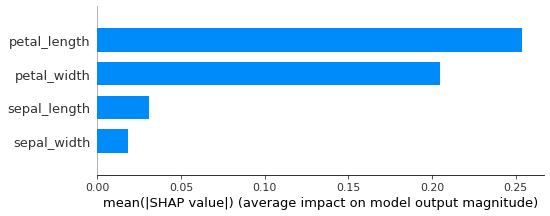

In [ ]:
explainer = shap.TreeExplainer(CLF)
shap_values = explainer.shap_values(X_SMOTE_std)
shap.summary_plot(shap_values[1], X_SMOTE_std, plot_type='bar',feature_names=Xcols)

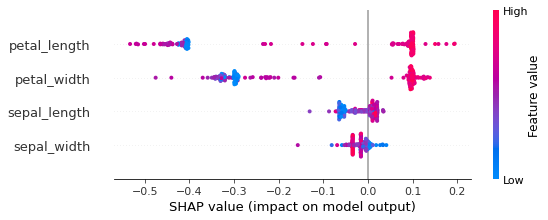

In [ ]:
shap.summary_plot(shap_values[1], X_SMOTE_std,feature_names=Xcols)

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

In [ ]:
!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

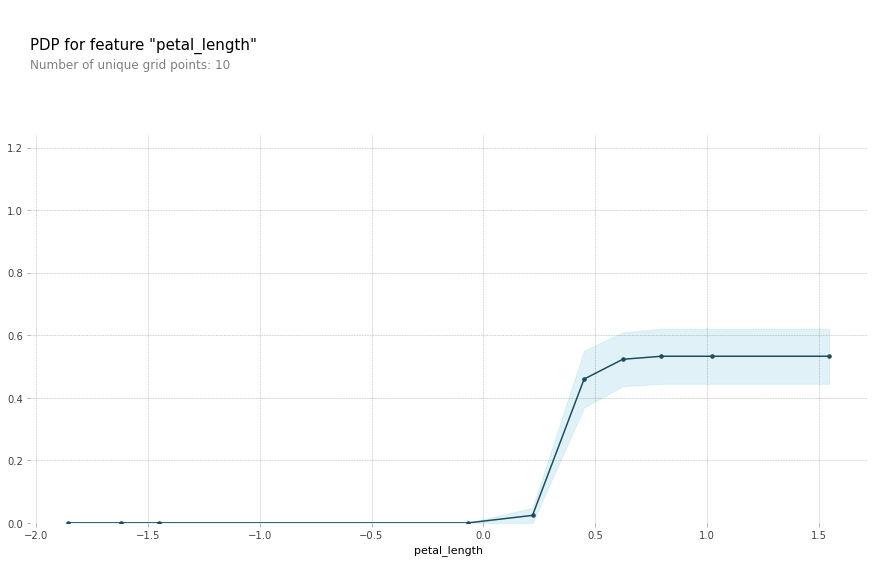

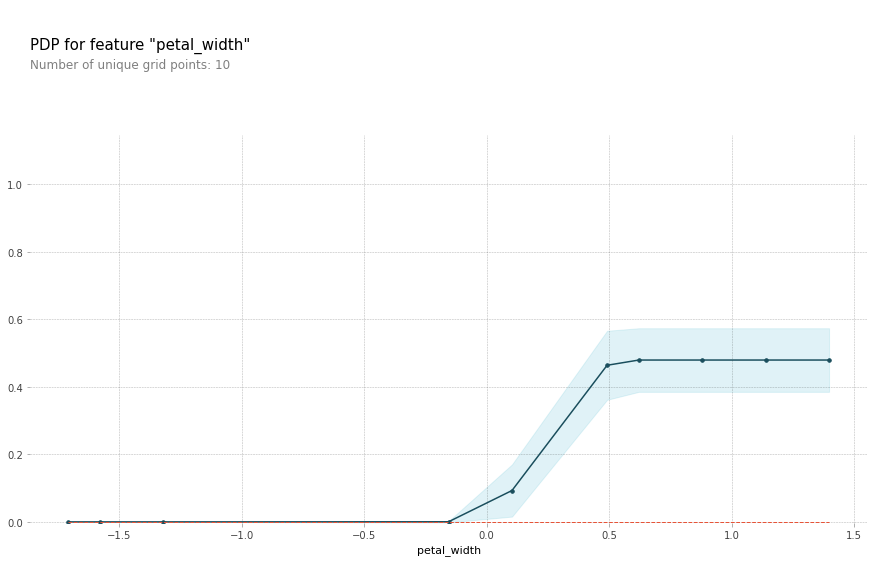

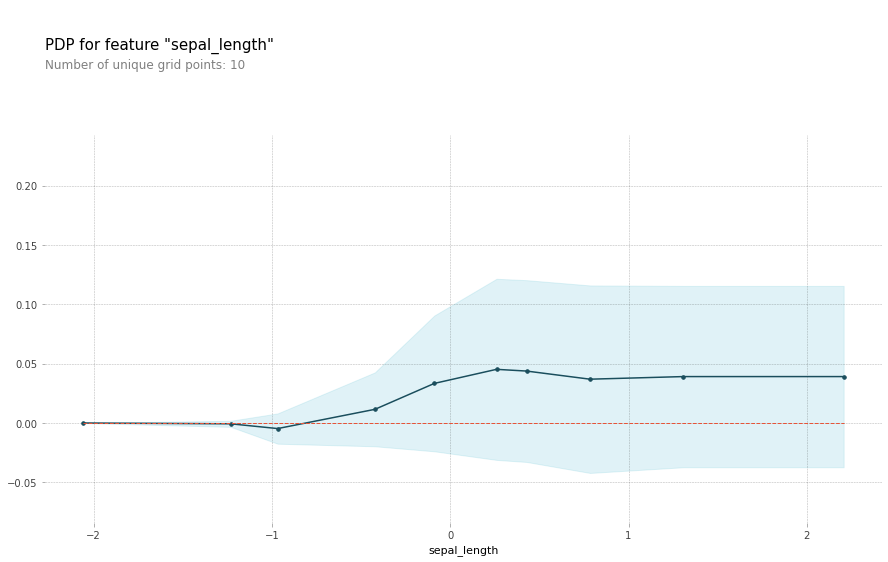

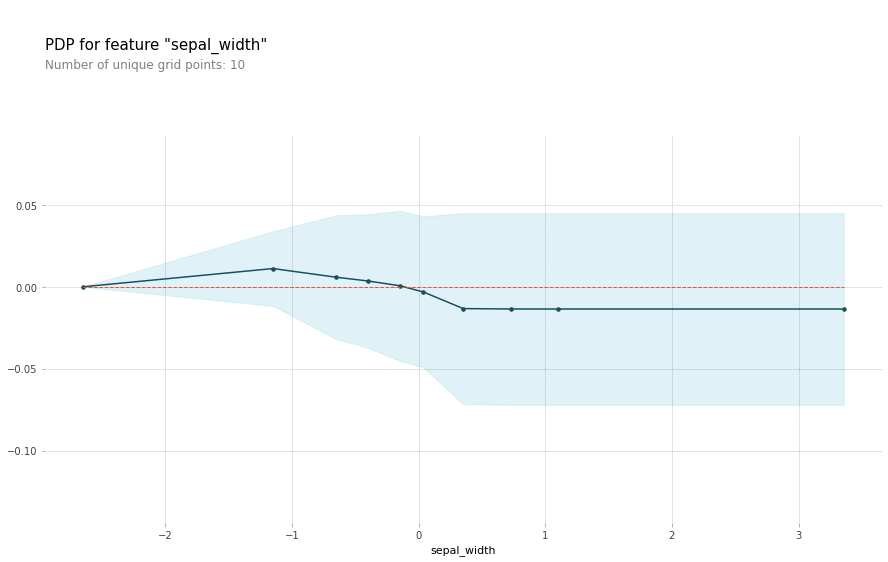

In [ ]:
X_SMOTE_std.columns = Xcols
for i in ['petal_length','petal_width','sepal_length','sepal_width']:
    pdp_ = pdp.pdp_isolate(model = CLF, dataset = X_SMOTE_std, model_features=Xcols, feature = i)
    pdp.pdp_plot(pdp_, str(i))
    plt.show()

In [ ]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

Computing partial dependence and ICE plots...


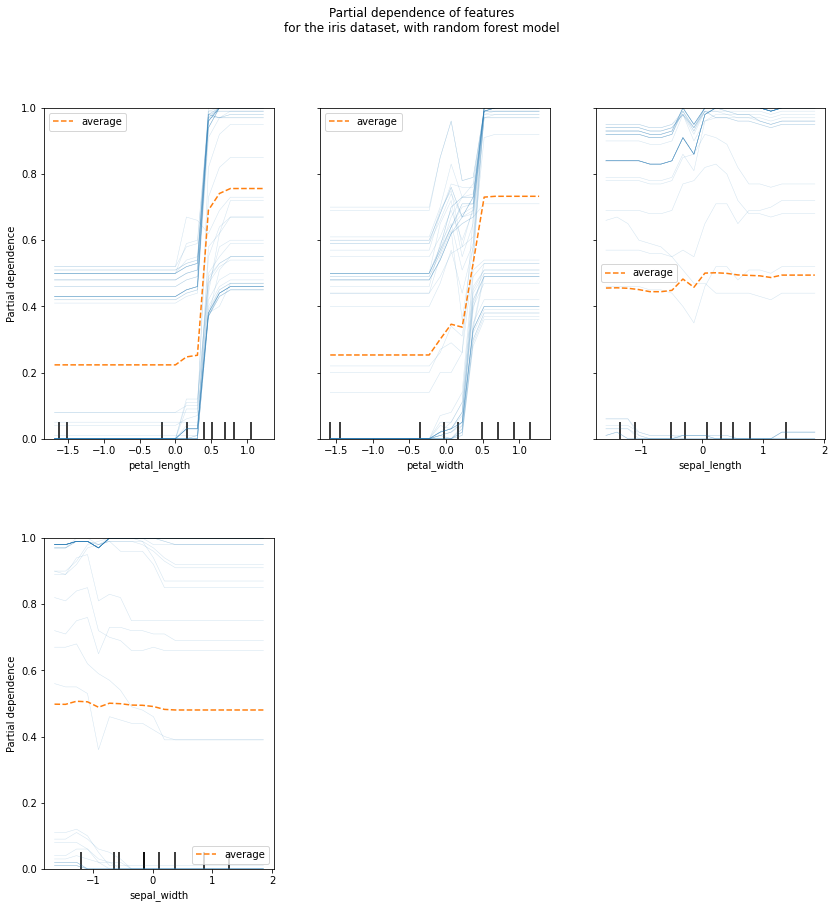

In [ ]:
# Creare PDP & ICE plots
print("Computing partial dependence and ICE plots...")
features = ['petal_length','petal_width','sepal_length','sepal_width']
fig, ax = plt.subplots(figsize=(14, 14))
display = PartialDependenceDisplay.from_estimator(
    CLF,
    X_SMOTE_std,
    features,
    kind="both",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"}, ax=ax
)
display.figure_.suptitle(
    "Partial dependence of features\n"
    "for the iris dataset, with random forest model"
)
display.figure_.subplots_adjust(hspace=0.3)

In [ ]:
# Preparation for LIME
predict_fn_rf = lambda x: CLF.predict_proba(x).astype(float)

# Create a LIME Explainer
X = X_SMOTE_std.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,
  feature_names = X_SMOTE_std.columns,
  class_names = ['0','1'],
  kernel_width = 4)

# Choose the data point to be explained
chosen_index = X_SMOTE_std.index[10]
chosen_instance = X_SMOTE_std.loc[chosen_index].values
ci = pd.DataFrame([chosen_instance], columns = X_SMOTE_std.columns)
print('Chosen Instance to be explained:',ci,'has actual target value',y_SMOTE.loc[chosen_index],'and predicted value ',y_pred.loc[chosen_index])

# Use the LIME explainer to explain the data point
exp = explainer.explain_instance(
  chosen_instance,
  predict_fn_rf,
  num_features = 4)
exp.show_in_notebook(show_all=False)

Chosen Instance to be explained:    sepal_length  sepal_width  petal_length  petal_width
0       -0.7573     1.603798     -1.567592    -1.579255 has actual target value species_virginica    0
Name: 10, dtype: uint8 and predicted value  0    0
Name: 10, dtype: uint8


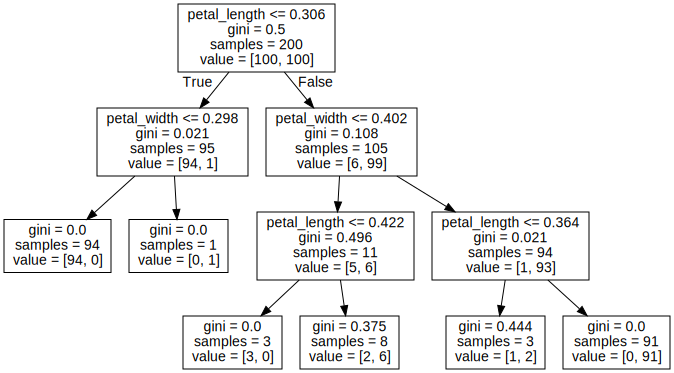

In [ ]:
# Decision Tree for Random Forest model
from sklearn import tree
import graphviz

proxy = DecisionTreeClassifier(random_state = 20850,max_depth=3)    # Control the depth of the proxy tree here
proxy.fit(X_SMOTE_std,y_pred)

tree_graph = tree.export_graphviz(proxy, out_file = None, feature_names = Xcols)
graphviz.Source(tree_graph)

In [ ]:
# How good is this surrogate decision tree model? Let's find out...
y_proxy = proxy.predict(X_SMOTE_std) # Use the decision tree to make predictions
y_proxy = pd.DataFrame(y_proxy)
print('Correlation coefficient of RF predictions and Surrogate Model predictions: ',y_pred.corrwith(y_proxy,axis=0))

Correlation coefficient of RF predictions and Surrogate Model predictions:  0    0.970437
dtype: float64


##Conclusion

I Used every feature in this dataset since it has only 4 predictors.Looking at  feature importance of the Random forest model it shows us that sepal_weidth and speal lengths importance is very low.

petal length seems to have a high impact on output based on shap value graph and petal width also has a high impact on the output.sepal length and speal width seem to be lower.

In Lime it correctly predicted species_virginica to be 0 and it actually was 0
and all 4 features seem to be predicting that aswell

We can also use pdp to see at which values of the features theres a higher chance of it being virginica

The decision tree seems to be using petal length and width which supports our finding.





